# Data Pre-Processing.

In [54]:
# Importing libraries to be used.
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from numpy import set_printoptions
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import Binarizer

In [3]:
# loading the dataset.
df = pd.read_csv('diabetes.csv')

In [8]:
# Rescaling data ( between 0 and 1).
array = df.values
# separating array into input and output components.
X = array[:,0:8]
Y = array[:,8]
scaler = MinMaxScaler(feature_range=(0, 1))
rescaledX = scaler.fit_transform(X)
# summarizing the transformed data.
set_printoptions(precision=3)
print(rescaledX[0:5,:])

[[0.353 0.744 0.59  0.354 0.    0.501 0.234 0.483]
 [0.059 0.427 0.541 0.293 0.    0.396 0.117 0.167]
 [0.471 0.92  0.525 0.    0.    0.347 0.254 0.183]
 [0.059 0.447 0.541 0.232 0.111 0.419 0.038 0.   ]
 [0.    0.688 0.328 0.354 0.199 0.642 0.944 0.2  ]]


In [10]:
# Standardize data (0 mean, 1 stdev).
# separating array into input and output components
X = array[:,0:8]
Y = array[:,8]
scaler = StandardScaler().fit(X)
rescaledX = scaler.transform(X)
# summarizing transformed data
set_printoptions(precision=3)
print(rescaledX[0:5,:])

[[ 0.64   0.848  0.15   0.907 -0.693  0.204  0.468  1.426]
 [-0.845 -1.123 -0.161  0.531 -0.693 -0.684 -0.365 -0.191]
 [ 1.234  1.944 -0.264 -1.288 -0.693 -1.103  0.604 -0.106]
 [-0.845 -0.998 -0.161  0.155  0.123 -0.494 -0.921 -1.042]
 [-1.142  0.504 -1.505  0.907  0.766  1.41   5.485 -0.02 ]]


In [13]:
# Normalize data (length of 1).
# separating array into input and output components
X = array[:,0:8]
Y = array[:,8]
scaler = Normalizer().fit(X)
normalizedX = scaler.transform(X)
# summarizing transformed data
set_printoptions(precision=3)
print(normalizedX[0:5,:])

[[0.034 0.828 0.403 0.196 0.    0.188 0.004 0.28 ]
 [0.008 0.716 0.556 0.244 0.    0.224 0.003 0.261]
 [0.04  0.924 0.323 0.    0.    0.118 0.003 0.162]
 [0.007 0.588 0.436 0.152 0.622 0.186 0.001 0.139]
 [0.    0.596 0.174 0.152 0.731 0.188 0.01  0.144]]


In [16]:
# binarization of data.
X = array[:,0:8]
Y = array[:,8]
binarizer = Binarizer(threshold=0.0).fit(X)
binaryX = binarizer.transform(X)

set_printoptions(precision=3)
print(binaryX[0:5,:])

[[1. 1. 1. 1. 0. 1. 1. 1.]
 [1. 1. 1. 1. 0. 1. 1. 1.]
 [1. 1. 1. 0. 0. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1.]
 [0. 1. 1. 1. 1. 1. 1. 1.]]


In [23]:
#train_test_splitting of the dataset

X = df.drop(columns = 'Outcome')

# Getting Predicting Value
y = df['Outcome']

from sklearn.model_selection import train_test_split 
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

## Model building.

## Random forest classifier.

In [24]:
rfc=RandomForestClassifier()
rfc.fit(X_train,y_train)

RandomForestClassifier()

In [25]:
# Cross validation and mean performance test for training data
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator=rfc, X=X_train ,y=y_train,cv=10)
print("accuracy is {:.2f} %".format(accuracies.mean()*100))
print("std is {:.2f} %".format(accuracies.std()*100))

accuracy is 73.78 %
std is 4.44 %


In [26]:
# Prediction.
pre1 = rfc.predict(X_test)

In [27]:
# Accuracy, confusion matrix, training score, mean squared error, r2 score.
Random_forest=accuracy_score(pre1,y_test)
print(accuracy_score(pre1,y_test))
print(confusion_matrix(pre1,y_test))
print("Training Score:\n",rfc.score(X_train,y_train)*100)
print("Mean Squared Error:\n",mean_squared_error(y_test, pre1))
print("R2 score is:\n",r2_score(y_test, pre1))

0.8181818181818182
[[94 15]
 [13 32]]
Training Score:
 100.0
Mean Squared Error:
 0.18181818181818182
R2 score is:
 0.14257307615828196


In [28]:
# Classification report.
print(classification_report(pre1,y_test))

              precision    recall  f1-score   support

           0       0.88      0.86      0.87       109
           1       0.68      0.71      0.70        45

    accuracy                           0.82       154
   macro avg       0.78      0.79      0.78       154
weighted avg       0.82      0.82      0.82       154



## Decision Tress Classifier.

In [29]:
dc=DecisionTreeClassifier(criterion='gini')
dc.fit(X_train,y_train)

DecisionTreeClassifier()

In [30]:
# Cross validation test for training data.
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator=dc, X=X_train ,y=y_train,cv=10)
print("accuracy is {:.2f} %".format(accuracies.mean()*100))
print("std is {:.2f} %".format(accuracies.std()*100))

accuracy is 69.73 %
std is 4.82 %


In [31]:
# Prediction.
pre2=dc.predict(X_test)

In [32]:
#  Accuracy, confusion matrix, training score, mean squared error, r2 score.
Decisiontress_classifier=accuracy_score(pre2,y_test)
print(accuracy_score(pre2,y_test))
print(confusion_matrix(pre2,y_test))
print("Training Score:\n",dc.score(X_train,y_train)*100)
print("Mean Squared Error:\n",mean_squared_error(y_test, pre2))
print("R2 score is:\n",r2_score(y_test, pre2))

0.7922077922077922
[[87 12]
 [20 35]]
Training Score:
 100.0
Mean Squared Error:
 0.2077922077922078
R2 score is:
 0.020083515609465197


In [33]:
# Classification report.
print(classification_report(pre2,y_test))

              precision    recall  f1-score   support

           0       0.81      0.88      0.84        99
           1       0.74      0.64      0.69        55

    accuracy                           0.79       154
   macro avg       0.78      0.76      0.77       154
weighted avg       0.79      0.79      0.79       154



## Naive bayes-Gaussian NB.

In [34]:
gb=GaussianNB()
gb.fit(X_train,y_train)

GaussianNB()

In [35]:
# Cross validation test for training data
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator=gb, X=X_train ,y=y_train,cv=10)
print("accuracy is {:.2f} %".format(accuracies.mean()*100))
print("std is {:.2f} %".format(accuracies.std()*100))

accuracy is 74.27 %
std is 5.51 %


In [36]:
# Prediction.
pre3=gb.predict(X_test)

In [37]:
#  Accuracy, confusion matrix, training score, mean squared error, r2 score.
Naive_bayes_Gaussian_nb=accuracy_score(pre3,y_test)
print(accuracy_score(pre3,y_test))
print(confusion_matrix(pre3,y_test))
print("Training Score:\n",gb.score(X_train,y_train)*100)
print("Mean Squared Error:\n",mean_squared_error(y_test, pre3))
print("R2 score is:\n",r2_score(y_test, pre3))

0.7922077922077922
[[93 18]
 [14 29]]
Training Score:
 75.7328990228013
Mean Squared Error:
 0.2077922077922078
R2 score is:
 0.020083515609465197


In [38]:
# Classification report.
print(classification_report(pre3,y_test))

              precision    recall  f1-score   support

           0       0.87      0.84      0.85       111
           1       0.62      0.67      0.64        43

    accuracy                           0.79       154
   macro avg       0.74      0.76      0.75       154
weighted avg       0.80      0.79      0.79       154



## KNN.

In [39]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=7)

knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=7)

In [40]:
# Cross validation test for training data
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator=knn, X=X_train ,y=y_train,cv=10)
print("accuracy is {:.2f} %".format(accuracies.mean()*100))
print("std is {:.2f} %".format(accuracies.std()*100))

accuracy is 71.64 %
std is 4.19 %


In [41]:
pre7 =knn.predict(X_test)

In [42]:
k=accuracy_score(pre7,y_test)
print(accuracy_score(pre7,y_test))
print("Confusion Matrix:\n",confusion_matrix(y_test, pre7))
print("Training Score:\n",knn.score(X_train,y_train)*100)
print("Mean Squared Error:\n",mean_squared_error(y_test, pre7))
print("R2 score is:\n",r2_score(y_test, pre7))

0.7597402597402597
Confusion Matrix:
 [[90 17]
 [20 27]]
Training Score:
 78.17589576547232
Mean Squared Error:
 0.24025974025974026
R2 score is:
 -0.13302843507655582


In [43]:
print("Classification Report is:\n",classification_report(pre7,y_test))

Classification Report is:
               precision    recall  f1-score   support

           0       0.84      0.82      0.83       110
           1       0.57      0.61      0.59        44

    accuracy                           0.76       154
   macro avg       0.71      0.72      0.71       154
weighted avg       0.76      0.76      0.76       154



## SVM.

In [44]:
sv=SVC(kernel='linear',random_state=0)
sv.fit(X_train,y_train)

SVC(kernel='linear', random_state=0)

In [45]:
# Cross validation test for training data
accuracies = cross_val_score(estimator=sv, X=X_train ,y=y_train,cv=10)
print("accuracy is {:.2f} %".format(accuracies.mean()*100))
print("std is {:.2f} %".format(accuracies.std()*100))

accuracy is 75.40 %
std is 4.68 %


In [46]:
# Prediction.
pre5=sv.predict(X_test)

In [47]:
# Accuracy and confusion matrix.
svm_linear=accuracy_score(pre5,y_test)
print(accuracy_score(pre5,y_test))
print(confusion_matrix(pre5,y_test))
print("Training Score:\n",sv.score(X_train,y_train)*100)
print("Mean Squared Error:\n",mean_squared_error(y_test, pre5))
print("R2 score is:\n",r2_score(y_test, pre5))

0.8181818181818182
[[97 18]
 [10 29]]
Training Score:
 76.54723127035831
Mean Squared Error:
 0.18181818181818182
R2 score is:
 0.14257307615828196


In [48]:
# Classification report.
print(classification_report(pre5,y_test))

              precision    recall  f1-score   support

           0       0.91      0.84      0.87       115
           1       0.62      0.74      0.67        39

    accuracy                           0.82       154
   macro avg       0.76      0.79      0.77       154
weighted avg       0.83      0.82      0.82       154



## Accuracies of all classification model overview.

In [70]:
print('svmlinear:',svm_linear)
print('knn:',k)
print('naive bayes:',Naive_bayes_Gaussian_nb)
print('Decision tress:',Decisiontress_classifier)
print('Random forest:',Random_forest)

svmlinear: 0.8181818181818182
knn: 0.7597402597402597
naive bayes: 0.7922077922077922
Decision tress: 0.7922077922077922
Random forest: 0.8181818181818182


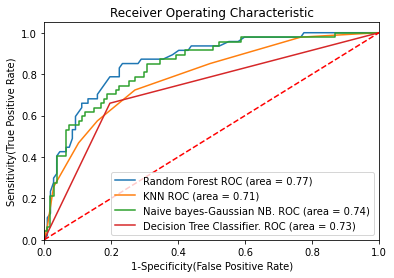

In [71]:
from sklearn import metrics
import matplotlib.pyplot as plt

plt.figure()

# models to the list to be viewed on the ROC plot
models = [
    

    {
    'label': 'Random Forest',
    'model': RandomForestClassifier(),
    },
    
    {
    'label': 'KNN',
    'model': KNeighborsClassifier(n_neighbors=7),
    },
    
    {
    'label': 'Naive bayes-Gaussian NB.',
    'model':  GaussianNB(),
    },
    
    {
    'label': 'Decision Tree Classifier.',
    'model':  DecisionTreeClassifier(),
    },
    
]

# Below for loop iterates through your models list
for m in models:
    model = m['model']
    model.fit(X_train, y_train)
    y_pred=model.predict(X_test)
    
# Compute False postive rate, and True positive rate
    fpr, tpr, thresholds = metrics.roc_curve(y_test, model.predict_proba(X_test)[:,1])
    
# Calculate Area under the curve to display on the plot
    auc = metrics.roc_auc_score(y_test,model.predict(X_test))
    
# Now, plot the computed values
    plt.plot(fpr, tpr, label='%s ROC (area = %0.2f)' % (m['label'], auc))
    
# Custom settings for the plot 
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1-Specificity(False Positive Rate)')
plt.ylabel('Sensitivity(True Positive Rate)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()